In [27]:
# imports
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datascience.util import sample_proportions

In [4]:
world_population = pd.read_csv("WorldPopulationByAge2020.csv")
world_population

,Location,AgeGrp,PopMale,PopFemale,PopTotal
0,Afghanistan,0-19,10709.0,10197.0,20906.0
1,Afghanistan,20-39,5994.0,5574.0,11568.0
2,Afghanistan,40-59,2485.0,2316.0,4801.0
3,Afghanistan,60+,781.0,858.0,1639.0
4,Africa,0-19,344109.0,334982.0,679091.0
...,...,...,...,...,...
1755,Zambia,60+,258.0,365.0,623.0
1756,Zimbabwe,0-19,3941.0,3923.0,7864.0
1757,Zimbabwe,20-39,1993.0,2354.0,4347.0
1758,Zimbabwe,40-59,892.0,1060.0,1952.0


In [40]:
# world_population["male_female_difference"] = world_population["PopMale"] - world_population["PopFemale"]
# world_population

In [54]:
# General assumptoin is that the male and female population will be generally distributeed in half
# We can change this distribution by calculating the general trend in male and female population percent in all countries, maybe for that particular age group
male_female_expected_distribution = [0.5, 0.5]

def get_one_simulation(location, age_group, population_type):
    total_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), population_type]
    one_sample = sample_proportions(total_pop.iloc[0] , male_female_expected_distribution)
    one_sample_male_female_diff = (one_sample[0] - one_sample[1]) * total_pop.iloc[0]
    return one_sample_male_female_diff

print(get_one_simulation("Nepal", "20-39", "PopTotal"))


142.0000000000005


In [55]:
# Get actual values of male and female population and compute the difference
def get_male_female_pop(location, age_group):
    male_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), "PopMale"]
    female_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), "PopFemale"]
    return (male_pop, female_pop)

nepal_male_pop, nepal_female_pop = get_male_female_pop("Nepal", "20-39")
nepal_male_female_diff = nepal_male_pop - nepal_female_pop
nepal_male_female_diff

1097   -1576.0
dtype: float64

In [56]:
# Do 1000 simulations
male_female_pop_diffs = []

for i in range(0,1000):
    one_sample = get_one_simulation("Nepal", "20-39", "PopTotal")
    male_female_pop_diffs.append(one_sample)

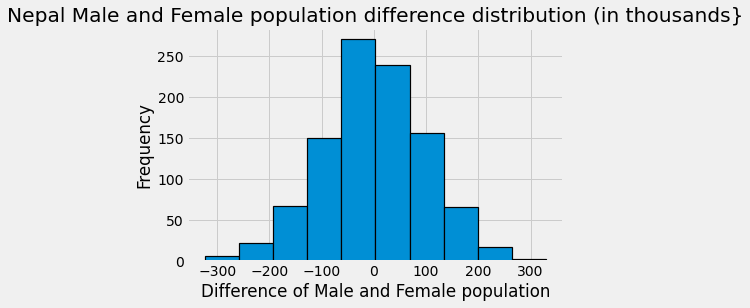

In [58]:
# Draw histogram from the distribution

def plot_histogram(male_female_pop_diff, title):
    plt.hist(male_female_pop_diffs, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Difference of Male and Female population")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(male_female_pop_diffs, "Nepal Male and Female population difference distribution (in thousands}")
